In [1]:
#!/usr/bin/env python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial
from entropy import ent_kde, ent_knn

dim = 1
nframes = 1000


In [2]:
def gen_sample(dist, dim, nframes, xmin, xmax, *args):
    """
    Generate a sample of a given distribution via Monte Carlo simulation
    """
    rng = np.random.default_rng(2021)
    sample = []

    while nframes > 0:
        dom = rng.uniform(xmin, xmax)
        img = dist(dom, *args)
        ran = rng.uniform(0, 1)
        if img > ran:
           nframes -= 1
           sample.append(dom)
    
    return np.array(sample)
    

In [3]:
# 1. Normal distribution

def norm_dist(x, mean, var):
    return (np.pi*var) * np.exp(-0.5*((x-mean)/var)**2)


mean, var = 0, .8
xmin, xmax = -3, 3

#X1 = np.random.normal(mean, var, nframes).reshape(-1, 1)
X1 = gen_sample(norm_dist, dim, nframes, xmin, xmax, mean, var).reshape(-1, 1)

norm_ent = round(0.5 * np.log((2*np.pi*np.e) * var), 4)
kde_norm = round(ent_kde(X1, bound1=xmin, bound2=xmax), 4)
knn_norm = round(ent_knn(X1, n_neighbors=10), 4)

print(f'Normal distribution with mean {mean} and variance {var}')
print('Real entropy: ', norm_ent)
print('KDE entropy:  ', kde_norm)
print('KNN entropy:  ', knn_norm)


Normal distribution with mean 0 and variance 0.8
Real entropy:  1.3074
KDE entropy:   1.3777
KNN entropy:   1.2532


In [4]:
# 2. Logistic distribution

def log_dist(x, s, mu):
    exp = np.exp(-(x-mu) / s)
    return exp / (s*(1 + exp)**2)


s, mu = 2, 2
xmin, xmax = -11, 11

#X2 = np.random.logistic(s, mu, nframes).reshape(-1, 1)
X2 = gen_sample(log_dist, dim, nframes, xmin, xmax, s, mu).reshape(-1, 1)

log_ent = round(np.log(s) + 2, 4)
kde_log = round(ent_kde(X2, bound1=xmin, bound2=xmax), 4)
knn_log = round(ent_knn(X2, n_neighbors=10), 4)

print(f'Logistic distribution with location {mu} and scale {s}')
print('Real entropy: ', log_ent)
print('KDE entropy:  ', kde_log)
print('KNN entropy:  ', knn_log)


Logistic distribution with location 2 and scale 2
Real entropy:  2.6931
KDE entropy:   2.6407
KNN entropy:   2.5288


In [5]:
# 2. Logistic distribution

def log_dist(x, s, mu):
    sum_exp = np.sum(np.exp(-(x-mu) / s))
    return (factorial(dim) / s.prod()) * (1 + sum_exp) * sum_exp


def log_ent(X):
    def A(p):
        if p == 1:
            return 1
        else:
            p_fact = factorial(p) / factorial(p-1)
            return (p_fact/p**2) - (p_fact/p)*A(p-1)

    return np.sum(np.log(s)) - np.log(factorial(dim)) + (dim+1)*A(dim)


s, mu = np.zeros(dim) + 2, np.zeros(dim) + 2
xmin, xmax = -10, 30

X2 = gen_sample(log_dist, dim, nframes, xmin, xmax, s, mu).reshape(-1, 1)

log_ent = round(log_ent(X2), 4)
kde_log = round(ent_kde(X2, bound1=xmin, bound2=xmax), 4)
knn_log = round(ent_knn(X2, n_neighbors=10), 4)

print(f'Logistic distribution with location mu={mu} and scale s={s}')
print('Real entropy: ', log_ent)
print('KDE entropy:  ', kde_log)
print('KNN entropy:  ', knn_log)


Logistic distribution with location mu=[2.] and scale s=[2.]
Real entropy:  2.6931
KDE entropy:   2.6896
KNN entropy:   2.6136


In [6]:
# 3. Exponential distribution

def exp_dist(x, lamb):
    return lamb * np.exp(-lamb * x)


lamb = 1
xmin, xmax = 0, 8

#X3 = np.random.exponential(lamb, nframes).reshape(-1, 1)
X3 = gen_sample(exp_dist, dim, nframes, xmin, xmax, lamb).reshape(-1, 1)

exp_ent = round(1 - np.log(lamb), 4)
kde_exp = round(ent_kde(X3, bound1=xmin, bound2=xmax), 4)
knn_exp = round(ent_knn(X3, n_neighbors=10), 4)

print(f'Exponential distribution with rate {lamb}')
print('Real entropy: ', exp_ent)
print('KDE entropy:  ', kde_exp)
print('KNN entropy:  ', knn_exp)


Exponential distribution with rate 1
Real entropy:  1.0
KDE entropy:   1.0659
KNN entropy:   0.9163


In [7]:
# 4. Pareto distribution

def par_dist(x, x_m, alpha):
    return (alpha*(x_m**alpha)) / (x**(alpha+1))


# x must be greater than x_m
x_m, alpha = 1, 2
xmin, xmax = 5, 150

#X4 = ((np.random.pareto(alpha, nframes) + 2) * x_m).reshape(-1, 1)
X4 = gen_sample(par_dist, dim, nframes, xmin, xmax, x_m, alpha).reshape(-1, 1)

par_ent = round(np.log((alpha/x_m) * np.exp(1 + 1/alpha)), 4)
kde_par = round(ent_kde(X4, bound1=xmin, bound2=xmax), 4)
knn_par = round(ent_knn(X4, n_neighbors=10), 4)

print(f'Pareto distribution with scale {x_m} and shape {alpha}')
print('Real entropy: ', par_ent)
print('KDE entropy:  ', kde_par)
print('KNN entropy:  ', knn_par)


Pareto distribution with scale 1 and shape 2
Real entropy:  2.1931
KDE entropy:   2.3994
KNN entropy:   2.3347


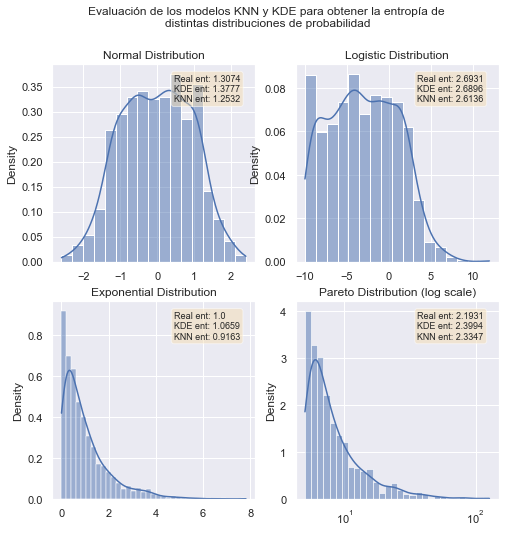

In [8]:
# Plots
sns.set_theme(style="darkgrid")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

# Legend box style
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

sns.histplot(X1, stat='density',  kde=True, ax=ax1, legend=False)
ax1.set_title("Normal Distribution")
ax1.set_xlabel("")
legend_1 = f'Real ent: {norm_ent}\nKDE ent: {kde_norm}\nKNN ent: {knn_norm}'
ax1.text(0.60, 0.95, legend_1, transform=ax1.transAxes, fontsize=9,
    verticalalignment='top', bbox=props)

sns.histplot(X2, stat='density', kde=True, ax=ax2, legend=False)
ax2.set_title("Logistic Distribution")
ax2.set_xlabel("")
legend_2 = f'Real ent: {log_ent}\nKDE ent: {kde_log}\nKNN ent: {knn_log}'
ax2.text(0.60, 0.95, legend_2, transform=ax2.transAxes, fontsize=9,
    verticalalignment='top', bbox=props)

sns.histplot(X3, stat='density', kde=True, ax=ax3, legend=False)
ax3.set_title("Exponential Distribution")
ax3.set_xlabel("")
legend_3 = f'Real ent: {exp_ent}\nKDE ent: {kde_exp}\nKNN ent: {knn_exp}'
ax3.text(0.60, 0.95, legend_3, transform=ax3.transAxes, fontsize=9,
    verticalalignment='top', bbox=props)

sns.histplot(X4, stat='density', kde=True, ax=ax4, legend=False, log_scale=True)
ax4.set_title("Pareto Distribution (log scale)")
ax4.set_xlabel("")
legend_4 = f'Real ent: {par_ent}\nKDE ent: {kde_par}\nKNN ent: {knn_par}'
ax4.text(0.60, 0.95, legend_4, transform=ax4.transAxes, fontsize=9,
    verticalalignment='top', bbox=props)

plt.suptitle("Evaluación de los modelos KNN y KDE para obtener la entropía de \n"
    "distintas distribuciones de probabilidad")

plt.show()


In [9]:
# Mean square error

ent_vect = []
kde_vect = []
knn_vect = []

error_kde = []
error_knn = []

for i in np.linspace(1, 5, 10):

    xmin, xmax = -(i+2), i+2

    mean, var = 0, i

    X = gen_sample(norm_dist, dim, nframes, xmin, xmax, mean, var).reshape(-1, 1)

    norm_ent = round(0.5 * np.log((2*np.pi*np.e) * var), 4)
    kde_norm = round(ent_kde(X, bound1=xmin, bound2=xmax), 4)
    knn_norm = round(ent_knn(X, n_neighbors=10), 4)

    ent_vect.append(norm_ent)
    kde_vect.append(kde_norm)
    knn_vect.append(knn_norm)

    error_kde.append((norm_ent-kde_norm)**2)
    error_knn.append((norm_ent-knn_norm)**2)


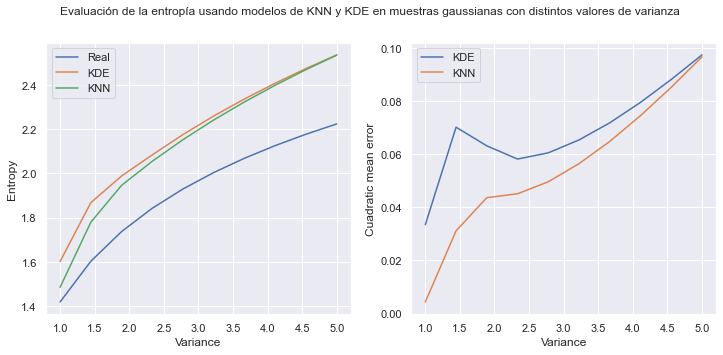

In [12]:
# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x = np.linspace(1, 5, 10)

sns.lineplot(x=x, y=ent_vect, label='Real', ax=ax1)
sns.lineplot(x=x, y=kde_vect, label='KDE', ax=ax1)
sns.lineplot(x=x, y=knn_vect, label='KNN', ax=ax1)

sns.lineplot(x=x, y=error_kde, label="KDE", ax=ax2)
sns.lineplot(x=x, y=error_knn, label="KNN", ax=ax2)

ax1.set_xlabel("Variance")
ax1.set_ylabel("Entropy")

ax2.set_xlabel("Variance")
ax2.set_ylabel("Cuadratic mean error")

plt.suptitle("Evaluación de la entropía usando modelos de KNN y KDE en muestras "
    "gaussianas con distintos valores de varianza"
)
plt.savefig("./img/variance_error_1dim.jpg", format="jpg")

plt.show()